## Text Analytics - MsC Data Science (part time) 24' | 4th Assignement

| Name      | CV |
|-----------|-----|
| Τριάντης Γεώργιος      | p3352303  |
| Μπαλτάς Ιωάννης     | p3352307 |
| Πλυμένος Παπαγέωργας Ιάσων   | p3352327  |
| Νίτσος Θεοφάνης   | p3352325  |


# Part-of-Speech Tagger Development Project

## Objective
Develop a part-of-speech (POS) tagger for one of the languages of the Universal Dependencies treebanks using an MLP (Multi-Layer Perceptron) operating on windows of words.

## Implementation Details
- **Algorithm**: MLP
- **Framework**: Keras/TensorFlow or PyTorch
- **Features**: Word embeddings (pre-trained)
- **Training, Development, and Test Subsets**: Separate subsets used
- **Hyper-parameter Tuning**: Tuned on the development subset
- **Monitoring Performance**: Performance on the development subset used to decide epochs

## Experimental Results
- **Baseline**: Tags each word with the most frequent tag it had in the training data
  - For unseen words, the baseline returns the most frequent tag over all words in the training data.

### Included in the Report
1. **Loss Curves**: Showing loss on training and development data across epochs.
   (See slide 49)

2. **Performance Metrics**:
   - Precision, recall, F1, precision-recall AUC scores for each class (tag) and classifier.
   - Separately evaluated for the training, development, and test subsets.
   
3. **Macro-Averaged Metrics**:
   - Macro-averaged precision, recall, F1, precision-recall AUC scores.
   - Averaged over classes for each classifier and evaluated separately for the training, development, and test subsets.

## Methodology and Datasets
- **Datasets Statistics**:
  - Average sentence length, number of training/dev/test sentences and words, vocabulary size.
- **Preprocessing Steps**:
  - Description of preprocessing steps performed.

For more details, refer to the report.

For frameworks:
- [Keras](http://keras.io/)
- [TensorFlow](https://www.tensorflow.org/)



### Based on universal dependencies

Alphabetical listing:

- **ADJ**: adjective
- **ADP**: adposition
- **ADV**: adverb
- **AUX**: auxiliary
- **CCONJ**: coordinating conjunction
- **DET**: determiner
- **INTJ**: interjection
- **NOUN**: noun
- **NUM**: numeral
- **PART**: particle
- **PRON**: pronoun
- **PROPN**: proper noun
- **PUNCT**: punctuation
- **SCONJ**: subordinating conjunction
- **SYM**: symbol
- **VERB**: verb
- **X**: other


## Installing required libraries

- pyconll, a low level wrapper around the CoNLL-U format.
- fasttext, a library of the selected pretrained tokenizer model

In [1]:
! pip install google
!pip install pyconll
!pip install fasttext-wheel
!pip install torchsummary

/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 617.8 kB/s eta 0:00:000:00:01
/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached pybind11-2.12.0-py3-none-any.whl.metadata (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.8 MB/s eta 0:00:0000:0100:01
Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)


## Downloading the Universal Dependencies treebanks dataset

In [11]:
!pip install fasttext-wheel

/bin/bash: /home/jason-server/miniconda3/envs/ta/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached fasttext_wheel-0.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (16 kB)
Using cached fasttext_wheel-0.9.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.4 MB)


In [4]:
from transformers import AutoTokenizer, AutoModel
import os
# import torch
import numpy as np
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
print(IN_COLAB)


greek_pretrained_model_path = 'wiki.el.bin'
if IN_COLAB:
    !apt-get install wget
    !wget -O ud-treebanks-v2.13.tgz https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-5287/ud-treebanks-v2.13.tgz?sequence=1&isAllowed=y
    !tar -xvf  'ud-treebanks-v2.13.tgz'
    local_dir = 'ud-treebanks-v2.13/UD_Greek-GUD/el_gud-ud-train.conllu'

    !wget -O wiki.el.zip https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.el.zip
    # Unzip the file
    import zipfile
    with zipfile.ZipFile("wiki.el.zip", 'r') as zip_ref:
      zip_ref.extractall("/content/")
else:
    
    local_dir = os.getcwd() + '\\data\\UD_Greek-GUD\\el_gud-ud-train.conllu'

print(local_dir)

ImportError: tokenizers>=0.14,<0.19 is required for a normal functioning of this module, but found tokenizers==0.19.1.
Try: `pip install transformers -U` or `pip install -e '.[dev]'` if you're working with git main

In [11]:
import os
local_dir = os.getcwd() + '/data/UD_Greek-GUD/el_gud-ud-train.conllu'

### Selection of a pre trained word embedding model

- Facebook's fasttext was selected, a pre-trained word vectors for 157 languages, trained on Common Crawl and Wikipedia.
- We download the pretrained tokenizer model for the Greek language. [here] (https://fasttext.cc/docs/en/pretrained-vectors.html)
- We can reduce the dimensionality if  it is our intention



In [92]:
reduce_dim = None # 100
import fasttext.util
ft = fasttext.load_model('wiki.el.bin')

if reduce_dim:
    fasttext.util.reduce_model(ft, 100)

ft.get_dimension()

300

In [93]:
ft.get_dimension()

300

In [6]:
test_word = 'γεια'
embedding = ft.get_word_vector(test_word)
print('word embeding: ', embedding)
print('Shape: ', embedding.shape)
print('Datatype: ', type(embedding))

word embeding:  [-2.01471373e-01 -8.19069967e-02 -6.30714357e-01  2.38028705e-01
  1.61352232e-01 -8.11730027e-02 -2.05985248e-01 -2.46288344e-01
  5.96133694e-02  3.13241690e-01  3.22496504e-01  2.58694142e-01
  1.99632481e-01  8.49099040e-01 -2.67637640e-01  1.09031834e-01
 -3.11452687e-01 -1.06538177e-01 -1.31129831e-01  1.24932252e-01
  4.69173700e-01  3.44497800e-01  2.88675010e-01 -3.31103563e-01
  5.76218724e-01 -5.36351018e-02 -1.93529874e-01  2.41987929e-01
  2.48569950e-01  2.41300315e-01 -1.72507957e-01  3.42797726e-01
 -1.35118723e-01 -1.63847357e-01 -1.06282175e-01 -3.98298241e-02
  1.52835688e-02 -2.01351345e-01  1.09172486e-01  2.81961143e-01
 -7.34199211e-03  3.00695121e-01  2.56839078e-02  1.65734693e-01
 -2.66208798e-01  4.67981130e-01 -9.00609195e-02  4.80905294e-01
  7.41786361e-01 -4.58357424e-01  5.10946214e-02 -1.52716622e-01
  1.78740844e-02  4.78239328e-01  8.06253552e-01  1.49014872e-02
 -1.89630315e-01 -3.26926708e-01 -3.95542413e-01  1.00748032e-01
 -4.40441

### We check that the model has embedded "close" words together

In [4]:
ft.get_nearest_neighbors('για',k=20)

[(0.5487291812896729, 'και'),
 (0.5428105592727661, 'επίσης,'),
 (0.5265333652496338, 'να'),
 (0.5225803852081299, 'προκειμένου'),
 (0.5152628421783447, 'σκοπό'),
 (0.5148484706878662, 'αλλά'),
 (0.5075995922088623, 'καθώς'),
 (0.506814181804657, '–για'),
 (0.4949963688850403, 'την'),
 (0.4937067925930023, 'σe'),
 (0.4928421080112457, 'που'),
 (0.4921763837337494, 'φτφ/nfgr'),
 (0.490660160779953, 'αυτός/ή'),
 (0.4868979752063751, 'χρησιμεύοντας'),
 (0.4801228940486908, '•\xa0\xa0'),
 (0.4787537157535553, 'όμως'),
 (0.4763149917125702, 'όμως,'),
 (0.4758837819099426, ',επίσης'),
 (0.47420328855514526, 'χρειαζόνταν'),
 (0.4724831283092499, 'επίσης')]

In [7]:
import numpy as np
# Iterate over vocabulary to find the most similar word
best_similarity = -1
best_word = None

for word in ft.get_words():
    word_embedding = ft.get_word_vector(word)
    similarity = np.dot(embedding, word_embedding) / (np.linalg.norm(embedding) * np.linalg.norm(word_embedding))
    if similarity > best_similarity:
        best_similarity = similarity
        best_word = word

print('Original word:', test_word)
print('Most similar word:', best_word)
print('Cosine similarity:', best_similarity)

Original word: γεια
Most similar word: γεια
Cosine similarity: 1.0000001


## Utilizing the fasttext model to create the datasets to be used in the MLP

In [8]:
import pyconll

# Step 1: Read CoNLL-U formatted file
def read_dataset(file_path, limit_sentences=None) -> list:
    """Read a CoNLL-U formatted file and return a list of sentences, where each sentence is a list of words.
    :param file_path: path to the CoNLL-U formatted file
    :param limit_sentences: limit the number of sentences to read (useful for debugging)
    :return: list of sentences, where each sentence is a list of words"""
    # Loading the file
    data = pyconll.load_from_file(file_path)
    sentences = []

    data_to_load = data[0:limit_sentences] if limit_sentences is not None else data
    # Iterating over each sentence
    for sentence in data_to_load:
        # Spliting the sentence to words
        words = [token.form for token in sentence]
        
        
        # Retrieving the POS of each words (Y)
        tags = [token.upos for token in sentence]

        # Saving for each data point of the dataset
        sentences.append({'words': words, 'tags': tags})
    return sentences

In [94]:
# Step 1: Read data
data = read_dataset(local_dir)
print(len(data))
data

1071


[{'words': ['Τον',
   'διαβεβαιώνω',
   'ότι',
   'δεν',
   'πρόκειται',
   'να',
   'δημοσιοποιηθεί',
   'από',
   'τη',
   'δική',
   'μας',
   'υπηρεσία',
   'και',
   'κλείνουμε',
   '.'],
  'tags': ['PRON',
   'VERB',
   'SCONJ',
   'PART',
   'VERB',
   'SCONJ',
   'VERB',
   'ADP',
   'DET',
   'ADJ',
   'PRON',
   'NOUN',
   'CCONJ',
   'VERB',
   'PUNCT']},
 {'words': ['Τη', 'ρωτάω', 'πάλι', '.'],
  'tags': ['PRON', 'VERB', 'ADV', 'PUNCT']},
 {'words': ['Όσο',
   'και',
   'αν',
   'χαίρομαι',
   'που',
   'βλέπω',
   'την',
   'κόρη',
   'μου',
   'με',
   'τον',
   'Φάνη',
   'και',
   'τη',
   'Μάνια',
   'με',
   'τον',
   'Ούλι',
   ',',
   'η',
   'πρώτη',
   'μου',
   'αντίδραση',
   'είναι',
   'να',
   'τους',
   'πω',
   '«',
   'καληνύχτα',
   '»',
   'και',
   'να',
   'πάω',
   'για',
   'ύπνο',
   '.'],
  'tags': ['ADV',
   'CCONJ',
   'SCONJ',
   'VERB',
   'SCONJ',
   'VERB',
   'DET',
   'NOUN',
   'PRON',
   'ADP',
   'DET',
   'PROPN',
   'CCONJ',
   'DET',


### Based on the evaluation of the previous excersise

Comment: " A context window of size 2 should consider the 2 previous and the 2 next tokens in the sentence if they exist(e.g for the first token in the sentence you get only the 2 next ones since no previous token(s) exist, for the second token in the sentence the 1 previous and the 2 next, for the last token in the sentence only the 2 previous tokens since there are no next tokens etc). In your implementation you used only left context since you consider only the previous tokens"

In [137]:
def create_context_windows_from_sentence(sentence: list, tags: list, window_size: int = 5) -> list:
    """Create context windows from a sentence. Each window will contain the words and tags within the window_size.
    :param sentence: list of words in the sentence
    :param tags: list of tags for each word in the sentence
    :param window_size: size of the context window
    
    :return: list of dictionaries, where each dictionary contains the original data, vectorized data, class, and word to classify for a given window"""
    # Ensure window_size is odd
    if window_size % 2 == 0:
        raise ValueError("Window size must be an odd number.")
    
    input_windows = []

    # Calculate the padding needed for the start and end of the sentence
    padding = window_size // 2
    
    # Add padding to the start and end of the sentence
    padded_sentence = [''] * padding + sentence + [''] * padding
    padded_tags = [''] * padding + tags + [''] * padding
    
    # Iterate over the sentence to create windows
    for i in range(padding, len(sentence) + padding):
        # Determine the start and end indices for the window
        start_index = i - padding
        end_index = i + padding + 1

        # Create the window
        window = padded_sentence[start_index:end_index]
        window_tags = padded_tags[start_index:end_index]

        # Vectorize the window
        vectorized_window = [ft.get_word_vector(word) for word in window]

        # Append the window data and class
        input_windows.append({
            'original_data': window,
            'vectorized_data': vectorized_window,
            'class': window_tags[padding],
            'word_to_classify': sentence[i - padding]
        })

    return input_windows

### Displaying a sample of the transformed data

In [138]:
test = create_context_windows_from_sentence(sentence=data[0]['words'], tags=data[0]['tags'], window_size=5)
len(test), [x['original_data'] for x in test], test[0]['vectorized_data'][0].shape

(15,
 [['', '', 'Τον', 'διαβεβαιώνω', 'ότι'],
  ['', 'Τον', 'διαβεβαιώνω', 'ότι', 'δεν'],
  ['Τον', 'διαβεβαιώνω', 'ότι', 'δεν', 'πρόκειται'],
  ['διαβεβαιώνω', 'ότι', 'δεν', 'πρόκειται', 'να'],
  ['ότι', 'δεν', 'πρόκειται', 'να', 'δημοσιοποιηθεί'],
  ['δεν', 'πρόκειται', 'να', 'δημοσιοποιηθεί', 'από'],
  ['πρόκειται', 'να', 'δημοσιοποιηθεί', 'από', 'τη'],
  ['να', 'δημοσιοποιηθεί', 'από', 'τη', 'δική'],
  ['δημοσιοποιηθεί', 'από', 'τη', 'δική', 'μας'],
  ['από', 'τη', 'δική', 'μας', 'υπηρεσία'],
  ['τη', 'δική', 'μας', 'υπηρεσία', 'και'],
  ['δική', 'μας', 'υπηρεσία', 'και', 'κλείνουμε'],
  ['μας', 'υπηρεσία', 'και', 'κλείνουμε', '.'],
  ['υπηρεσία', 'και', 'κλείνουμε', '.', ''],
  ['και', 'κλείνουμε', '.', '', '']],
 (300,))

In [139]:
test[0]

{'original_data': ['', '', 'Τον', 'διαβεβαιώνω', 'ότι'],
 'vectorized_data': [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,


In [141]:
from tqdm import tqdm
window_size = 5
dataset = []
for sentence in tqdm(data):
    data_set_to_use = create_context_windows_from_sentence(sentence=sentence['words'], tags=sentence['tags'], window_size=window_size)
    dataset.extend(data_set_to_use)

len(dataset)

100%|██████████| 1071/1071 [00:00<00:00, 2329.32it/s]


14860

In [142]:
example_index = 2
(dataset[example_index]['original_data'],
 dataset[example_index]['vectorized_data'],
 dataset[example_index]['class'],
 dataset[example_index]['vectorized_data'][0].shape
 )

(['Τον', 'διαβεβαιώνω', 'ότι', 'δεν', 'πρόκειται'],
 [array([-8.75070691e-03,  4.36865464e-02, -4.25346732e-01, -8.03080723e-02,
         -1.89689919e-01, -2.52161652e-01,  3.56036127e-01,  7.00473636e-02,
         -3.64488691e-01,  1.78792834e-01, -3.68425310e-01,  5.13504505e-01,
         -1.22169904e-01, -7.69278333e-02, -9.60447490e-02,  5.12755036e-01,
         -1.03704773e-01,  9.37386677e-02, -7.88162276e-02,  1.39081195e-01,
          7.02370927e-02, -4.55486953e-01, -1.84168071e-01,  2.40114536e-02,
         -4.51070786e-01,  1.05972942e-02,  5.13632111e-02,  8.84165764e-02,
          1.01211265e-01,  4.28049505e-01,  1.96067795e-01, -3.43128368e-02,
          2.59724826e-01,  1.33374617e-01,  1.59623176e-01,  5.28588414e-01,
          1.64925694e-01, -4.25447077e-01,  9.72185358e-02, -1.81543022e-01,
          1.53635561e-01, -4.33998853e-02,  4.51637916e-02,  4.23517764e-01,
         -4.26549911e-01,  4.91526008e-01,  1.96138471e-01, -1.71246827e-02,
         -9.98271536e-03

## For this current assignment we will use the TensorFlow framework

* First we verify the detection of the GPU

In [145]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [143]:
transform_data = []
X = []
y = []
for example in dataset:
    X.append(np.concatenate(example['vectorized_data'], axis=0))  
    y.append(example['class'])

# Convert strings to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_train_one_hot = to_categorical(y_train_encoded)

# Assuming X and Y are your separate lists
X_train, X_test, Y_train, Y_test = train_test_split(X, y_train_one_hot, train_size=0.8)

total_classes = list(set([x['class'] for x in dataset]))
print(total_classes, len(total_classes))

['VERB', 'ADJ', 'PUNCT', 'ADP', 'SCONJ', 'CCONJ', 'PRON', 'NUM', 'AUX', 'NOUN', 'INTJ', 'X', 'DET', 'PROPN', 'PART', 'ADV'] 16


## We also create a custom MetricsCallback inheriting from the Callback class of tensorflow

In [38]:
class MetricsCallback(Callback):
    def __init__(self, validation_data, plot_results: bool = False):
        super().__init__()
        self.validation_data = validation_data
        self.plot_results = plot_results
        self.metrics_data = {
            'train_loss': [],
            'dev_loss': [],
            'train_accuracy': [],
            'dev_accuracy': [],
            'train_precision': [],
            'dev_precision': [],
            'train_recall': [],
            'dev_recall': [],
            'train_f1_score': [],
            'dev_f1_score': [],
            'train_pr_auc': [],
            'dev_pr_auc': []
        }

    def on_epoch_end(self, epoch, logs=None):
        train_loss = logs.get('loss')
        dev_loss = logs.get('val_loss')
        train_accuracy = logs.get('categorical_accuracy')
        dev_accuracy = logs.get('val_categorical_accuracy')

        self.metrics_data['train_loss'].append(train_loss)
        self.metrics_data['dev_loss'].append(dev_loss)
        self.metrics_data['train_accuracy'].append(train_accuracy)
        self.metrics_data['dev_accuracy'].append(dev_accuracy)

        y_train_pred = np.argmax(self.model.predict(self.validation_data[0]), axis=1)
        y_train_true = np.argmax(self.validation_data[1], axis=1)
        train_precision = precision_score(y_train_true, y_train_pred, average='weighted', zero_division=1)
        train_recall = recall_score(y_train_true, y_train_pred, average='weighted', zero_division=1)
        train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')
        train_pr_auc = self.calculate_pr_auc(self.validation_data[0], y_train_true)
        self.metrics_data['train_precision'].append(train_precision)
        self.metrics_data['train_recall'].append(train_recall)
        self.metrics_data['train_f1_score'].append(train_f1)
        self.metrics_data['train_pr_auc'].append(train_pr_auc)

        y_val_pred = np.argmax(self.model.predict(self.validation_data[2]), axis=1)
        y_val_true = np.argmax(self.validation_data[3], axis=1)
        dev_precision = precision_score(y_val_true, y_val_pred, average='weighted', zero_division=1)
        dev_recall = recall_score(y_val_true, y_val_pred, average='weighted', zero_division=1)
        dev_f1 = f1_score(y_val_true, y_val_pred, average='weighted')
        dev_pr_auc = self.calculate_pr_auc(self.validation_data[2], y_val_true)
        self.metrics_data['dev_precision'].append(dev_precision)
        self.metrics_data['dev_recall'].append(dev_recall)
        self.metrics_data['dev_f1_score'].append(dev_f1)
        self.metrics_data['dev_pr_auc'].append(dev_pr_auc)
        if self.plot_results:
            print(f"Epoch {epoch+1}")
            print(f"Training Loss: {train_loss}, Validation Loss: {dev_loss}")
            print(f"Training Accuracy: {train_accuracy}, Validation Accuracy: {dev_accuracy}")
            print(f"Training Precision: {train_precision}, Validation Precision: {dev_precision}")
            print(f"Training Recall: {train_recall}, Validation Recall: {dev_recall}")
            print(f"Training F1 Score: {train_f1}, Validation F1 Score: {dev_f1}")
            print(f"Training Precision-Recall AUC: {train_pr_auc}, Validation Precision-Recall AUC: {dev_pr_auc}")

    def calculate_pr_auc(self, x_data, y_true):
        y_scores = self.model.predict(x_data)
        precision, recall, _ = precision_recall_curve(y_true, y_scores[:, 1], pos_label=1)
        pr_auc = auc(recall, precision)
        return pr_auc

    def get_metrics_dataframe(self):
        # Assuming epoch numbers are stored in a list called 'epoch_numbers'
        epoch_numbers = list(range(1, len(self.metrics_data['train_loss']) + 1))
        metrics_df = pd.DataFrame(self.metrics_data)
        metrics_df['Epoch'] = epoch_numbers
        return metrics_df


# Plotting the metrics
def plot_metrics(train_metric, val_metric, title, ylabel):
    plt.plot(train_metric)
    plt.plot(val_metric)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')

# Function to plot all metrics in a 2 x 3 grid
def multi_plot_all_metrics(dict_of_data):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plot_metrics(dict_of_data['train_loss'], dict_of_data['dev_loss'], 'Model Loss', 'Loss')

    plt.subplot(2, 3, 2)
    plot_metrics(dict_of_data['train_accuracy'], dict_of_data['dev_accuracy'], 'Model Accuracy', 'Accuracy')

    plt.subplot(2, 3, 3)
    plot_metrics(dict_of_data['train_precision'], dict_of_data['dev_precision'], 'Model Precision', 'Precision')

    plt.subplot(2, 3, 4)
    plot_metrics(dict_of_data['train_recall'], dict_of_data['dev_recall'], 'Model Recall', 'Recall')

    plt.subplot(2, 3, 5)
    plot_metrics(dict_of_data['train_f1_score'], dict_of_data['dev_f1_score'], 'Model F1 Score', 'F1 Score')

    plt.subplot(2, 3, 6)
    plot_metrics(dict_of_data['train_pr_auc'], dict_of_data['dev_pr_auc'], 'Model Precision-Recall AUC', 'Precision-Recall AUC')

    plt.tight_layout()
    plt.show()


In [146]:
# Preprocess the data
X = []
y = []
for example in dataset:
    X.append(np.concatenate(example['vectorized_data'], axis=0))  
    y.append(example['class'])

# Convert strings to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_train_one_hot = to_categorical(y_train_encoded)

# Split the data into training, validation, and testing sets
X_train, X_rest, Y_train, Y_rest = train_test_split(X, y_train_one_hot, train_size=0.8)
X_test, X_val, Y_test, Y_val = train_test_split(X_rest, Y_rest, test_size=0.5)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

### Baseline model: Previous excersise 2 hidden layer MLP

In [147]:
# Define model, loss, and optimizer
input_dim = X_train[0].shape[0]  # Updated input dimension
hidden_dim1 = 100
hidden_dim2 = 50
output_dim = len(np.unique(y_train_encoded))

# Create empty sequential model
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.InputLayer(input_shape=(input_dim,)))  # Specify the input shape
model.add(tf.keras.layers.Dense(hidden_dim1, activation='relu'))
model.add(tf.keras.layers.Dense(hidden_dim2, activation='relu'))
model.add(tf.keras.layers.Dense(output_dim, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_crossentropy", "categorical_accuracy"])

# Create the metrics callback (assuming MetricsCallback is defined elsewhere in your code)
metrics_callback = MetricsCallback((X_train, Y_train, X_val, Y_val), plot_results=False)

# Model summary
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               150100    
                                                                 
 dense_61 (Dense)            (None, 50)                5050      
                                                                 
 dense_62 (Dense)            (None, 16)                816       
                                                                 
Total params: 155,966
Trainable params: 155,966
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
93/93 [==============================] - 3s 22ms/step - loss: 1.3005 - categorical_crossentropy: 1.3005 - categorical_accuracy: 0.6278 - val_loss: 0.5828 - val_categorical_crossentropy: 0.5828 - val_categorical_accuracy: 0.8445
Epoch 2/20
93/93 [==============================] - 2s 19ms/step - loss: 0.4033 - categorical_crossentropy: 0.4033 - categorical_accuracy: 0.8949 - val_loss: 0.3679 - val_categorical_crossentropy: 0.3679 - val_categorical_accuracy: 0.9044
Epoch 3/20
93/93 [==============================] - 2s 19ms/step - loss: 0.2402 - categorical_crossentropy: 0.2402 - categorical_accuracy: 0.9361 - val_loss: 0.3089 - val_categorical_crossentropy: 0.3089 - val_categorical_accuracy: 0.9118
Epoch 4/20
93/93 [==============================] - 2s 20ms/step - loss: 0.1606 - categorical_crossentropy: 0.1606 - categorical_accuracy: 0.9615 - val_loss: 0.2948 - val_categorical_crossentropy: 0.2948 - val_categorical_accuracy: 0.9186
Epoch 5/20
93/93 [==========================

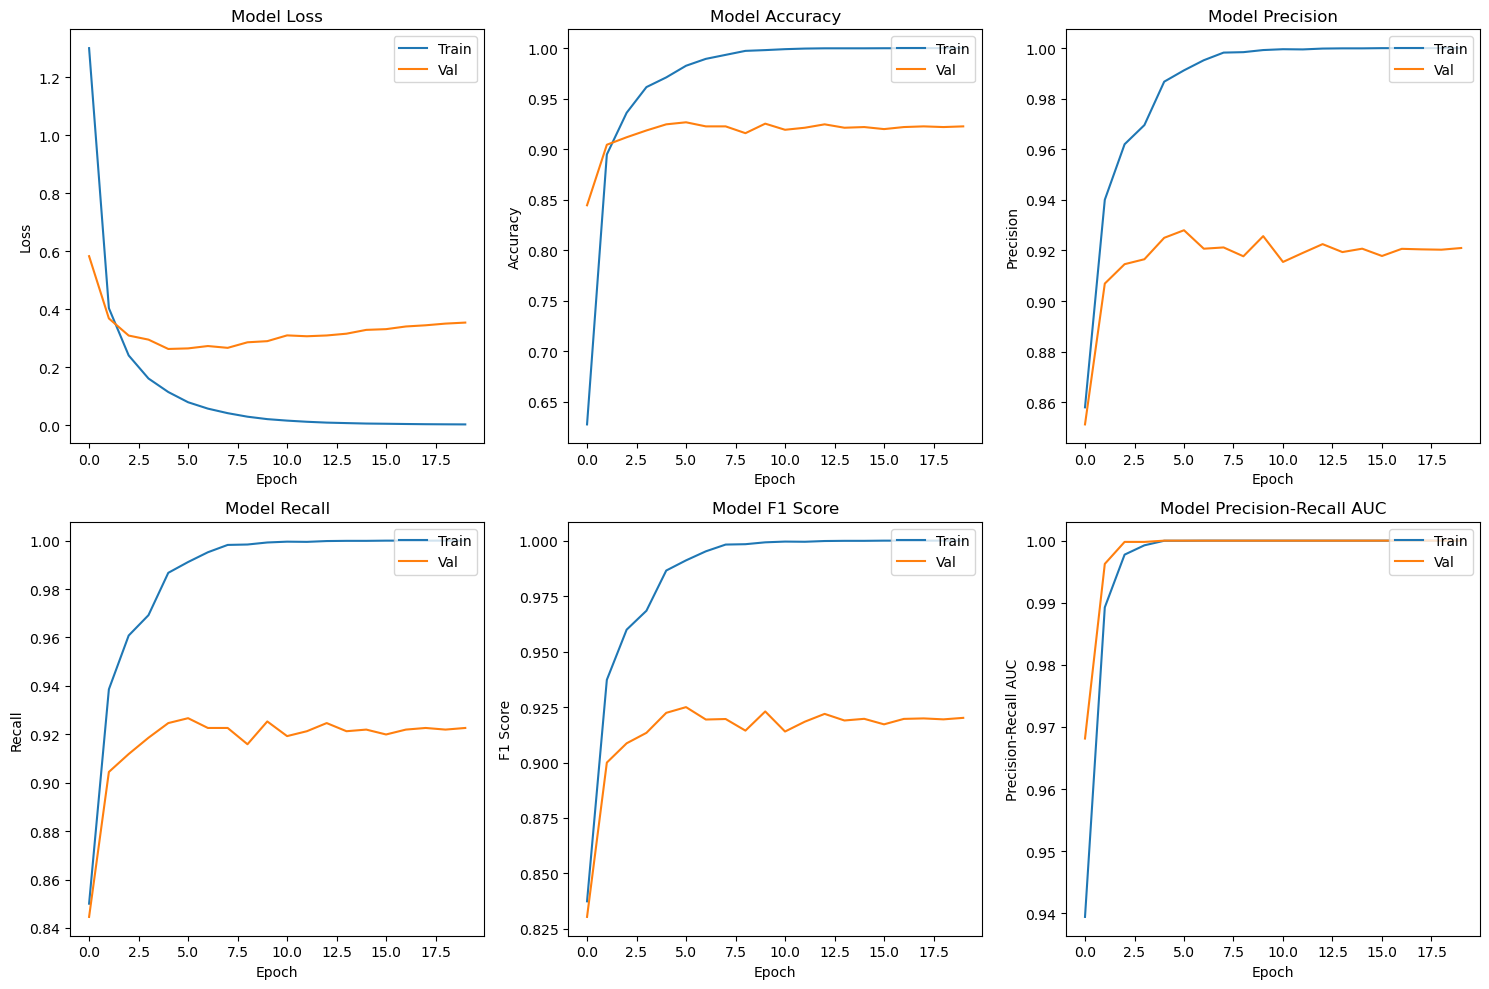

,train_loss,dev_loss,train_accuracy,dev_accuracy,train_precision,dev_precision,train_recall,dev_recall,train_f1_score,dev_f1_score,train_pr_auc,dev_pr_auc,Epoch
0,1.300536,0.582782,0.627776,0.844549,0.857973,0.851219,0.850017,0.844549,0.837446,0.830421,0.939420,0.968136,1
1,0.403293,0.367866,0.894852,0.904441,0.940047,0.906905,0.938594,0.904441,0.937268,0.899975,0.989261,0.996257,2
2,0.240219,0.308856,0.936070,0.911844,0.962003,0.914576,0.960801,0.911844,0.959877,0.908662,0.997748,0.999799,3
3,0.160649,0.294818,0.961474,0.918573,0.969577,0.916528,0.969213,0.918573,0.968413,0.913385,0.999249,0.999796,4
4,0.114000,0.262604,0.971063,0.924630,0.986746,0.925000,0.986709,0.924630,0.986531,0.922394,0.999984,1.000000,5
5,0.078771,0.264551,0.982587,0.926649,0.991224,0.927997,0.991168,0.926649,0.991115,0.924968,0.999984,1.000000,6
6,0.056736,0.272695,0.989401,0.922611,0.995223,0.920696,0.995205,0.922611,0.995188,0.919380,0.999998,1.000000,7
7,0.041080,0.266436,0.993355,0.922611,0.998239,0.921195,0.998234,0.922611,0.998233,0.919610,1.000000,1.000000,8
8,0.028881,0.285591,0.997308,0.915882,0.998413,0.917698,0.998402,0.915882,0.998399,0.914380,1.000000,1.000000,9
9,0.020482,0.289508,0.998065,0.925303,0.999246,0.925664,0.999243,0.925303,0.999243,0.923018,1.000000,1.000000,10


In [148]:
# Train the model
num_epochs = 20
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=num_epochs, batch_size=128, callbacks=[metrics_callback])

# Plotting the metrics
multi_plot_all_metrics(metrics_callback.metrics_data)

display(metrics_callback.get_metrics_dataframe())

### Having created the baseline model from the previous excersise we will now attempt to optimize the model further.
 We will attemp on the following different architectures
 * Bidirectional GRU
  * Bidirectional LSTM

Process:
  * We will start by "fixing" the main architecture of the models as well as the hyperparameters (epochs, batch size, metrics, etc.)
  * We wil then select the most successful model and attempt to optimize it further

  

## **Bidirectional GRU**

In [149]:
# Preprocess the data
X = []
y = []
for example in dataset:
    X.append(example['vectorized_data'])  
    y.append(example['class'])

# Convert strings to integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)

# One-hot encode the integer labels
y_train_one_hot = to_categorical(y_train_encoded)

# Split the data into training, validation, and testing sets
X_train, X_rest, Y_train, Y_rest = train_test_split(X, y_train_one_hot, train_size=0.8)
X_test, X_val, Y_test, Y_val = train_test_split(X_rest, Y_rest, test_size=0.5)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

Model: "Bidirectional_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_48 (Bidirecti  (None, 5, 300)           406800    
 onal)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 5, 300)            0         
                                                                 
 bidirectional_49 (Bidirecti  (None, 300)              406800    
 onal)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 300)               0         
                                                                 
 dense_71 (Dense)            (None, 200)               60200     
                                                                 
 dense_72 (Dense)            (None, 16)          

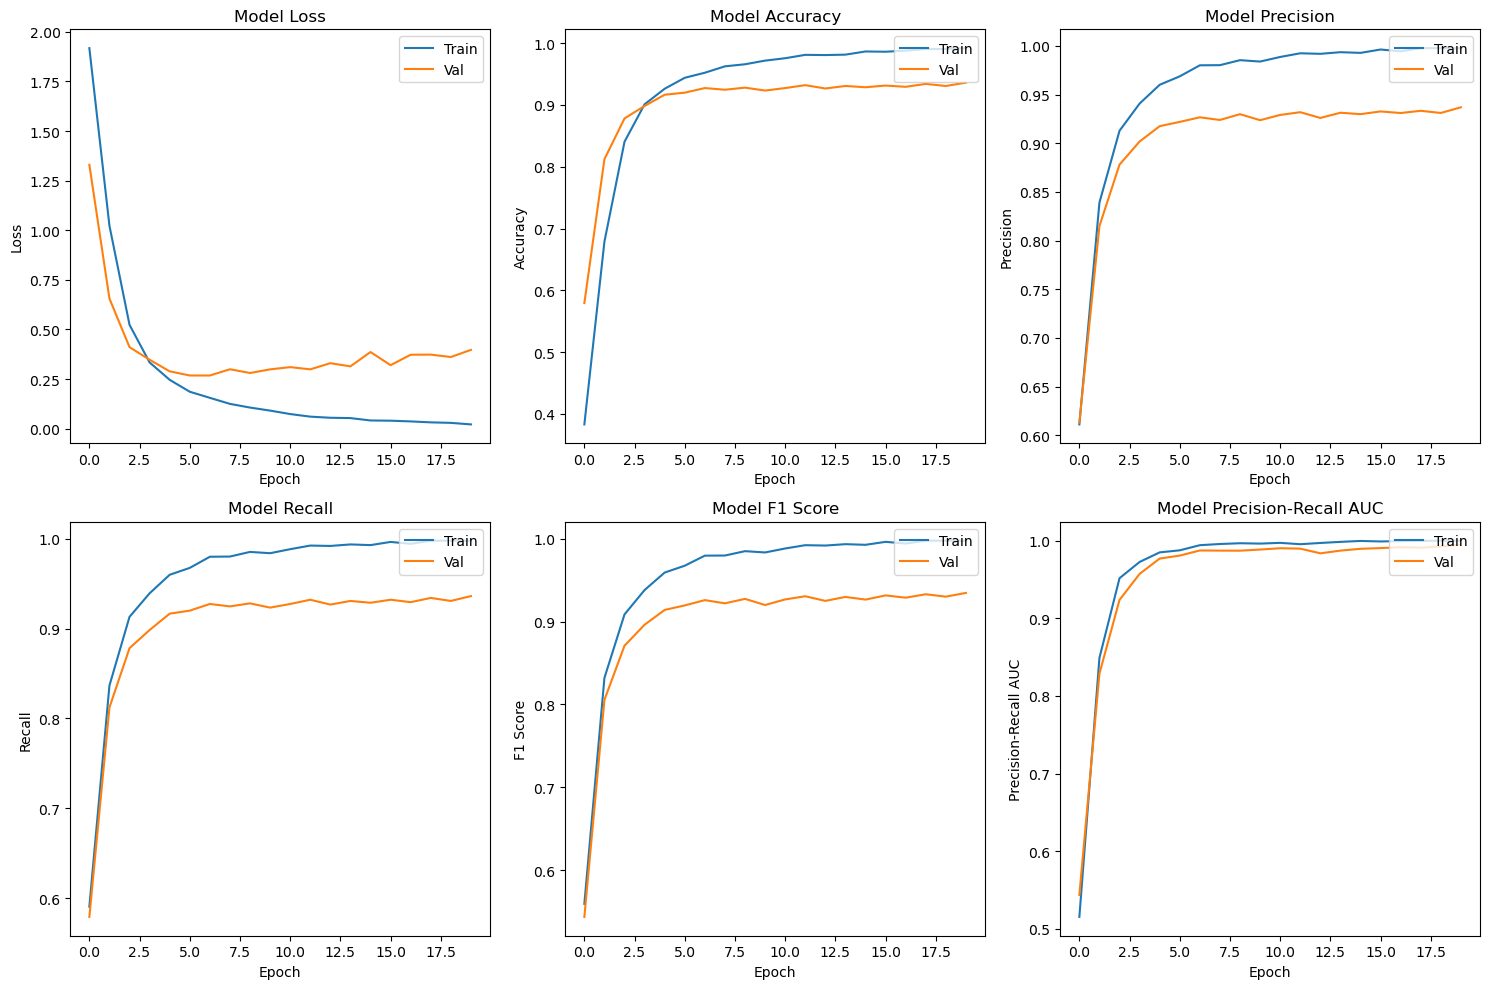

,train_loss,dev_loss,train_accuracy,dev_accuracy,train_precision,dev_precision,train_recall,dev_recall,train_f1_score,dev_f1_score,train_pr_auc,dev_pr_auc,Epoch
0,1.917923,1.329939,0.382991,0.579408,0.611146,0.613071,0.590764,0.579408,0.559136,0.543412,0.515494,0.543782,1
1,1.022676,0.655546,0.678920,0.812248,0.839092,0.815018,0.836642,0.812248,0.832038,0.805538,0.849006,0.828796,2
2,0.523150,0.410626,0.840511,0.878196,0.912864,0.878072,0.913022,0.878197,0.908698,0.870881,0.951609,0.923675,3
3,0.333589,0.347155,0.901077,0.898385,0.940801,0.901810,0.939182,0.898385,0.938116,0.896242,0.972520,0.957141,4
4,0.245912,0.288681,0.926228,0.916555,0.960102,0.917602,0.959791,0.916555,0.959210,0.914070,0.984869,0.976915,5
5,0.185902,0.267842,0.943977,0.919919,0.968786,0.921978,0.967446,0.919919,0.967475,0.919529,0.987514,0.980721,6
6,0.155093,0.267722,0.952137,0.927322,0.980127,0.926676,0.979812,0.927322,0.979613,0.925936,0.994117,0.987315,7
7,0.124746,0.299150,0.962483,0.924630,0.980260,0.923960,0.980064,0.924630,0.979759,0.922036,0.995651,0.987122,8
8,0.106064,0.280348,0.965848,0.927995,0.985396,0.929901,0.985195,0.927995,0.985029,0.927438,0.996630,0.987046,9
9,0.090762,0.298614,0.971736,0.923284,0.983965,0.923727,0.983765,0.923284,0.983469,0.920005,0.996162,0.988508,10


In [156]:
# Define input shape
input_shape = (5, 300)

# Create a Sequential model
model = Sequential(name='Bidirectional_GRU')

# First GRU layer
model.add(Bidirectional(GRU(150, return_sequences=True), input_shape=input_shape))
model.add(Dropout(0.45))

# Second GRU layer
model.add(Bidirectional(GRU(150, return_sequences=False)))
model.add(Dropout(0.45))

# Additional Dense layer
model.add(Dense(200, activation='relu'))
# Output layer
model.add(Dense(16, activation='sigmoid'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_crossentropy", "categorical_accuracy"])

# Assuming MetricsCallback is defined elsewhere in your code
# Create the metrics callback
metrics_callback = MetricsCallback((X_train, Y_train, X_val, Y_val), plot_results=False)

# Model summary
model.summary()

# Train the model
num_epochs = 20
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=num_epochs, batch_size=128, callbacks=[metrics_callback])

# Plotting the metrics
multi_plot_all_metrics(metrics_callback.metrics_data)

display(metrics_callback.get_metrics_dataframe())

### Bidirectional LSTM

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_50 (Bidirecti  (None, 5, 300)           541200    
 onal)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 5, 300)            0         
                                                                 
 bidirectional_51 (Bidirecti  (None, 300)              541200    
 onal)                                                           
                                                                 
 dropout_51 (Dropout)        (None, 300)               0         
                                                                 
 dense_73 (Dense)            (None, 200)               60200     
                                                                 
 dense_74 (Dense)            (None, 16)              

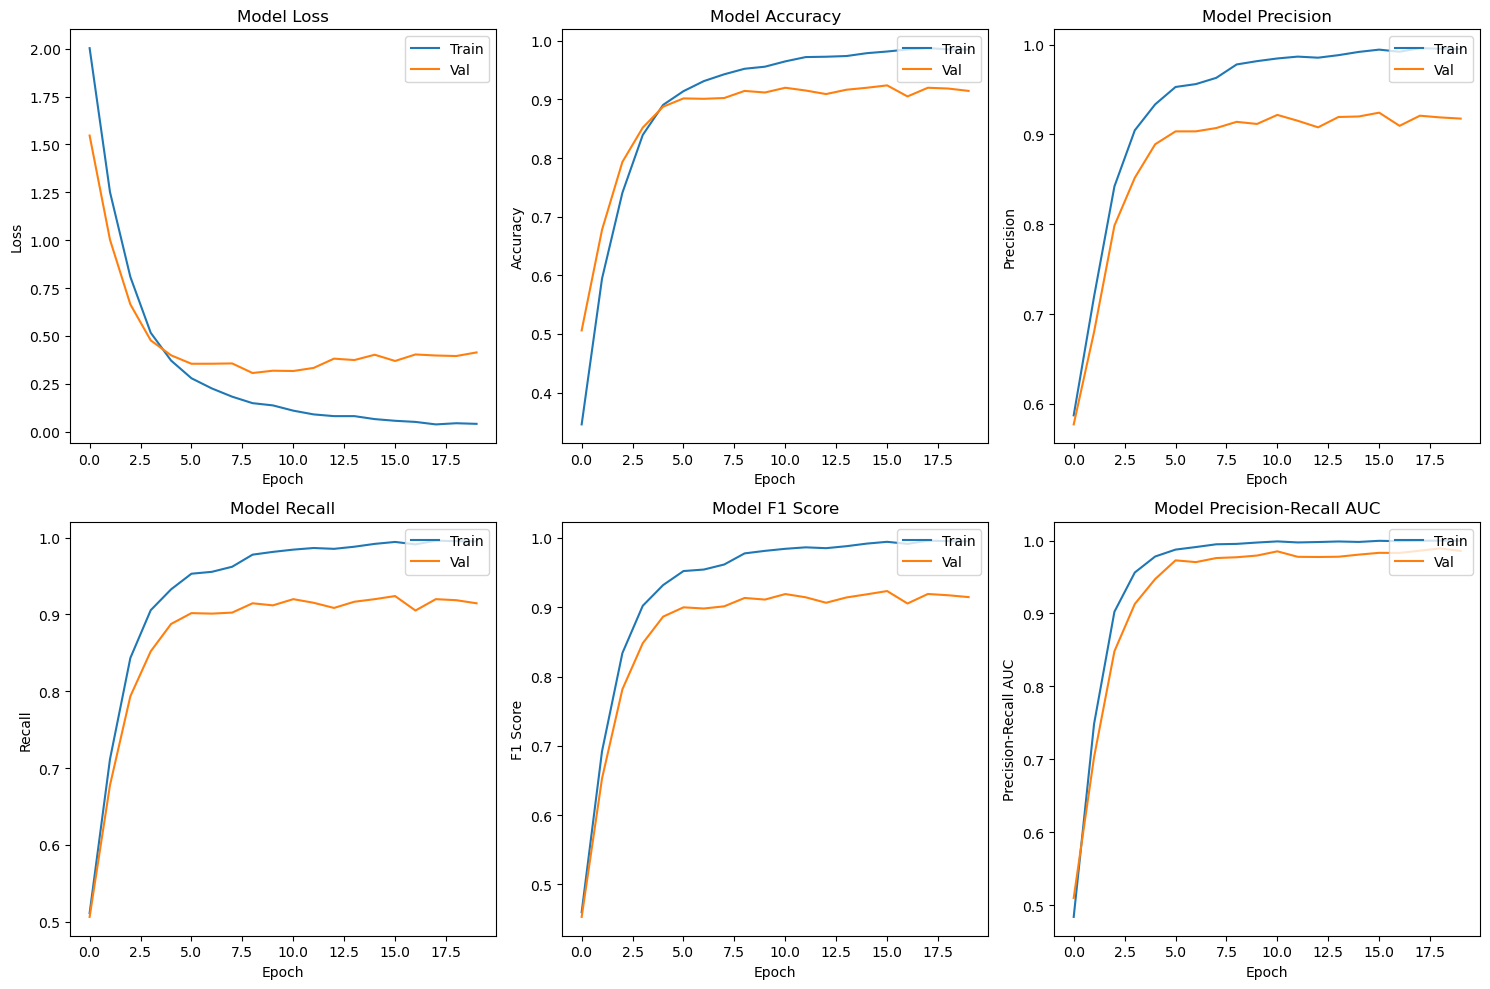

,train_loss,dev_loss,train_accuracy,dev_accuracy,train_precision,dev_precision,train_recall,dev_recall,train_f1_score,dev_f1_score,train_pr_auc,dev_pr_auc,Epoch
0,2.003219,1.546674,0.345811,0.506057,0.587120,0.577027,0.511020,0.506057,0.459827,0.452960,0.483801,0.509827,1
1,1.251345,1.002248,0.594465,0.677658,0.719506,0.680065,0.711474,0.677658,0.692076,0.652835,0.748579,0.703041,2
2,0.808239,0.664715,0.740831,0.793405,0.842186,0.798490,0.843287,0.793405,0.833823,0.781526,0.902470,0.848220,3
3,0.516283,0.476572,0.839418,0.851952,0.904637,0.851766,0.905535,0.851952,0.902109,0.848061,0.956238,0.913056,4
4,0.371146,0.398465,0.890730,0.887618,0.933539,0.889084,0.932705,0.887618,0.932000,0.886439,0.978181,0.947251,5
5,0.278661,0.354375,0.914115,0.901750,0.952904,0.903427,0.953062,0.901750,0.952238,0.899866,0.987651,0.972899,6
6,0.225528,0.354610,0.931275,0.901077,0.956112,0.903468,0.955501,0.901077,0.954420,0.898161,0.991172,0.970497,7
7,0.182417,0.356116,0.942884,0.902423,0.963069,0.907166,0.962147,0.902423,0.961694,0.901310,0.994936,0.976068,8
8,0.148592,0.306058,0.952305,0.914536,0.977982,0.914073,0.977877,0.914536,0.977730,0.913386,0.995488,0.977158,9
9,0.136877,0.318143,0.955838,0.911844,0.981680,0.911703,0.981494,0.911844,0.981386,0.911071,0.997344,0.979471,10


In [157]:
# Define input shape
input_shape = (5, 300)

# Create a Sequential model
model = Sequential()

# First GRU layer
model.add(Bidirectional(LSTM(150, return_sequences=True), input_shape=input_shape))
model.add(Dropout(0.45))

# Second GRU layer
model.add(Bidirectional(LSTM(150, return_sequences=False)))
model.add(Dropout(0.45))

# Additional Dense layer
model.add(Dense(200, activation='relu'))
# Output layer
model.add(Dense(16, activation='sigmoid'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=["categorical_crossentropy", "categorical_accuracy"])

# Assuming MetricsCallback is defined elsewhere in your code
# Create the metrics callback
metrics_callback = MetricsCallback((X_train, Y_train, X_val, Y_val), plot_results=False)

# Model summary
model.summary()

# Train the model
num_epochs = 20
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=num_epochs, batch_size=128, callbacks=[metrics_callback])

# Plotting the metrics
multi_plot_all_metrics(metrics_callback.metrics_data)

display(metrics_callback.get_metrics_dataframe())

AttributeError: 'History' object has no attribute 'models'

### We will now select the best model based on the results

| Model               | Dev Accuracy |
|---------------------|--------------|
| MLP                 | 0.922611     |
| **Bidirectional GRU**   | **0.936070**     |
| Bidirectional LSTM  | 0.914536     |

## Hyperparameter Tuning

In [159]:
# Function to create model
def create_model(learning_rate=0.001, dropout_rate=0.45, units=150, dense_units=200):
    model = Sequential(name='Bidirectional_GRU_tuned')
    model.add(Bidirectional(GRU(units, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(GRU(units, return_sequences=False)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(16, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=["categorical_crossentropy", "categorical_accuracy"])
    return model

# Define input shape
input_shape = (5, 300)

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.4, 0.45, 0.5],
    'units': [100, 150, 200, 500],
    'dense_units': [20, 150, 200, 250]
}

merged_X = np.concatenate((X_train, X_val), axis=0)
merged_Y = np.concatenate((Y_train, Y_val), axis=0)
# Perform randomized search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=3, verbose=2)
random_search_result = random_search.fit(merged_X, merged_Y)

# Print best results
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))



/tmp/ipykernel_52214/318589676.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END dense_units=150, dropout_rate=0.4, learning_rate=0.1, units=200; total time=   8.1s
[CV] END dense_units=150, dropout_rate=0.4, learning_rate=0.1, units=200; total time=   8.6s
[CV] END dense_units=150, dropout_rate=0.4, learning_rate=0.1, units=200; total time=   7.9s
[CV] END dense_units=20, dropout_rate=0.45, learning_rate=0.1, units=200; total time=   8.1s
[CV] END dense_units=20, dropout_rate=0.45, learning_rate=0.1, units=200; total time=   9.2s
[CV] END dense_units=20, dropout_rate=0.45, learning_rate=0.1, units=200; total time=   7.9s
[CV] END dense_units=20, dropout_rate=0.4, learning_rate=0.01, units=500; total time=   8.2s
[CV] END dense_units=20, dropout_rate=0.4, learning_rate=0.01, units=500; total time=   8.2s
[CV] END dense_units=20, dropout_rate=0.4, learning_rate=0.01, units=500; total time=   9.6s
[CV] END dense_units=20, dropout_rate=0.4, learning_rate=0.001, units=200; total time=   7.9s
[CV] END

/home/jason-server/miniconda3/envs/ta/lib/python3.9/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Best: nan using {'units': 200, 'learning_rate': 0.1, 'dropout_rate': 0.4, 'dense_units': 150}


In [160]:
# Define input shape
input_shape = (5, 300)

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2, 0.5],
    'dropout_rate': [0.1, 0.2, 0.4],
    'units': [200],
    'dense_units': [150]
}

merged_X = np.concatenate((X_train, X_val), axis=0)
merged_Y = np.concatenate((Y_train, Y_val), axis=0)
# Perform randomized search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=2)
random_search_result = random_search.fit(merged_X, merged_Y)

# Print best results
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

/tmp/ipykernel_52214/3196431897.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)
/home/jason-server/miniconda3/envs/ta/lib/python3.9/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.1, units=200; total time=   8.0s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.1, units=200; total time=   7.9s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.1, units=200; total time=   7.8s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.2, units=200; total time=   9.7s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.2, units=200; total time=   8.0s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.2, units=200; total time=   7.9s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.5, units=200; total time=   7.8s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.5, units=200; total time=   9.6s
[CV] END dense_units=150, dropout_rate=0.1, learning_rate=0.5, units=200; total time=   8.0s
[CV] END dense_units=150, dropout_rate=0.2, learning_rate=0.1, units=200; total time=   7.9s
[CV] END d

/home/jason-server/miniconda3/envs/ta/lib/python3.9/site-packages/sklearn/model_selection/_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best: nan using {'units': 200, 'learning_rate': 0.1, 'dropout_rate': 0.1, 'dense_units': 150}


 Include experimental results of a baseline that tags each word with
the most frequent tag it had in the training data; for words that were not encountered in the
training data, the baseline should return the most frequent tag (over all words) of the training
data. Also include experimental results of your best method of exercise 10 of Part 3, now
treated as an additional baseline. Include in your report: